# Demo

In [ ]:
from inference import SimpleInference

# Initialize model
engine = SimpleInference()

# Generate description
engine.generate(
    image_path="examples/image.png",
    prompt="describe",
    max_tokens=1024,
    temperature=0.8,
    top_p = 0.9
)



# Step 1: Prepare the image and prompt

## Load the image

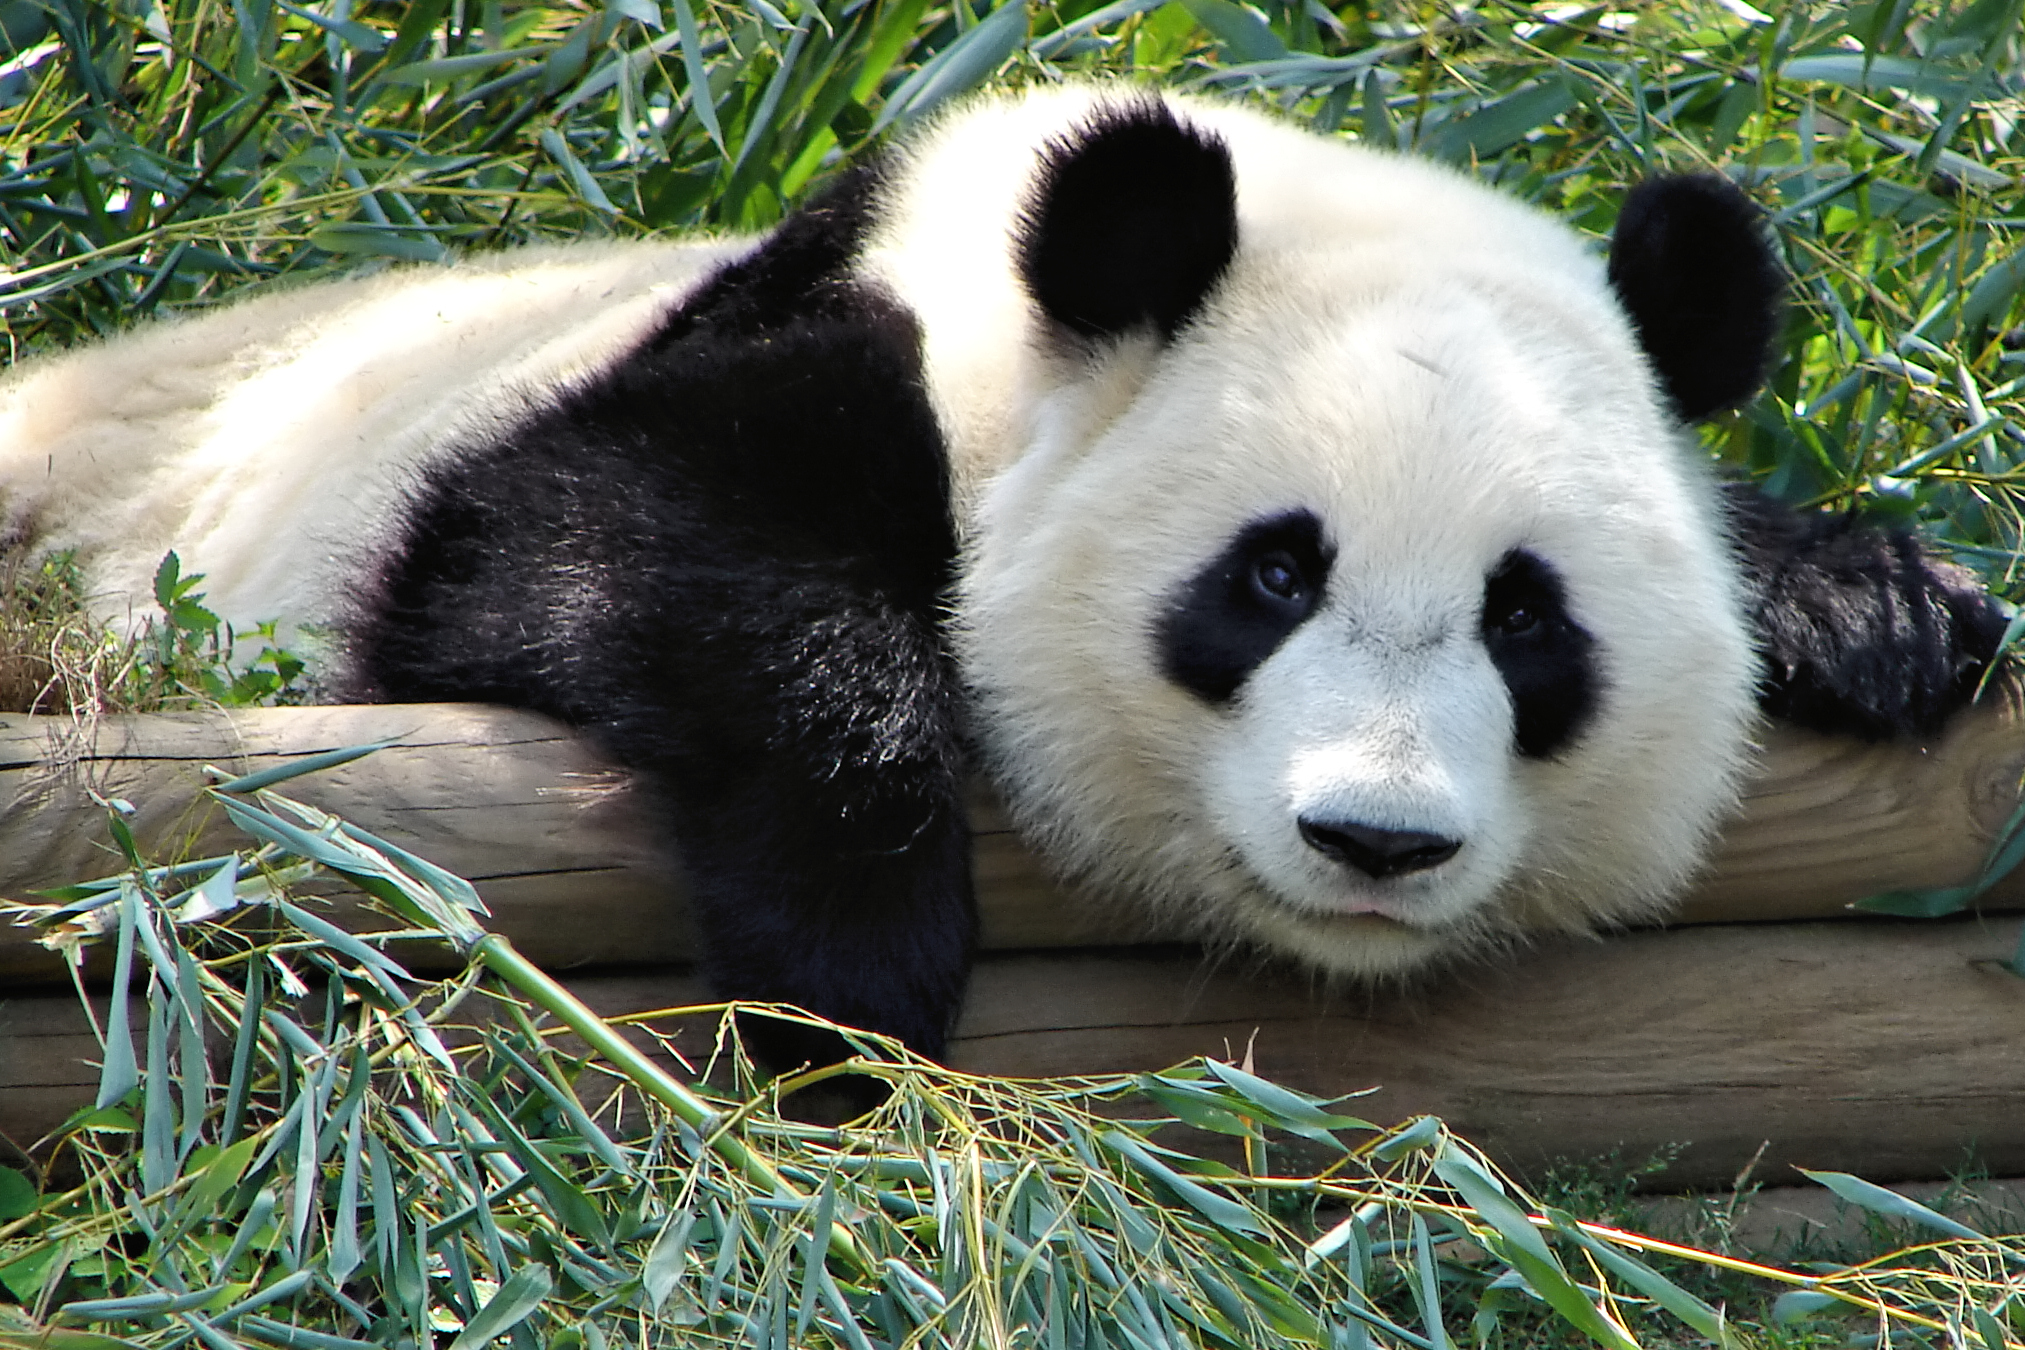

In [14]:
from PIL import Image

image = Image.open("examples/panda.jpg")
image


## Resize the image to 224x224

In [15]:
from PIL import Image
import numpy as np
import torch

from src.processor import process_images

IMAGENET_STANDARD_MEAN = [0.5, 0.5, 0.5]  # From HF code
IMAGENET_STANDARD_STD = [0.5, 0.5, 0.5]  # From HF code

pixel_values = process_images(
    [image],
    size=(224, 224),
    resample=Image.Resampling.BICUBIC,
    rescale_factor=1 / 255.0,
    image_mean=IMAGENET_STANDARD_MEAN,
    image_std=IMAGENET_STANDARD_STD,
)

pixel_values = np.stack(pixel_values, axis=0)
pixel_values = torch.tensor(pixel_values)

print(pixel_values.shape)


torch.Size([1, 3, 224, 224])
